<a href="https://colab.research.google.com/github/MariamMoawed/Credit-Card-Score-Prediction/blob/main/credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Read the CSV files (assuming they exist in the current directory)

credit_data = pd.read_csv('/content/credit_record.csv')
application_data = pd.read_csv('/content/application_record.csv')


In [ ]:
# Data preprocessing
def preprocess_data(df):
    # Handle missing values for numeric columns only
    numeric_df = df.select_dtypes(include=np.number)
    df[numeric_df.columns] = numeric_df.fillna(numeric_df.mean())

    # Convert categorical variables to numeric using one-hot encoding
    categorical_columns = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=categorical_columns)

    return df


In [ ]:
# Preprocess both datasets
credit_data_processed = preprocess_data(credit_data)
application_data_processed = preprocess_data(application_data)


In [ ]:
print("Columns in credit_data:", credit_data.columns)
print("Columns in application_data:", application_data.columns)


Columns in credit_data: Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')
Columns in application_data: Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')


In [ ]:

# Merge the datasets based on the 'ID' column
merged_data = pd.merge(application_data_processed, credit_data_processed, on='ID', how='inner')

# Print some info about the merged dataset
print("Shape of merged data:", merged_data.shape)
print("Columns of merged data:", merged_data.columns)
merged_data.head()

Shape of merged data: (777715, 64)
Columns of merged data: Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apa

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Waiters/barmen staff,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,0,False,False,False,False,False,False,True,False
1,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,-1,False,False,False,False,False,False,True,False
2,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,-2,False,False,False,False,False,False,True,False
3,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,-3,False,False,False,False,False,False,True,False
4,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,-4,False,False,False,False,False,False,True,False


In [ ]:
# prompt: Define features (X) and target variable (y) there is no ststus

# Define features (X) and target variable (y)
# Assuming 'STATUS' is the target variable (you'll need to adjust if it's different)

# Drop the 'ID' column as it's not a feature
X = merged_data.drop(['ID'], axis=1)

#  If you have a 'STATUS' column:
# Assuming 'STATUS' is your target variable.  You'll need to define how to handle non-numeric values
# For example, if you want to predict default, encode '0', '1', '2','3','4', '5' as no default and 'C', 'X' as default.

# Create a binary target variable for default prediction (0 = No default, 1=Default)

X = X.drop('MONTHS_BALANCE', axis = 1)
y = merged_data['MONTHS_BALANCE']
#Example using a lambda function to convert to binary
#y = merged_data['STATUS'].apply(lambda x: 0 if x in ['0','1','2','3','4','5'] else 1)

# Print shapes to confirm
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (777715, 62)
Shape of y: (777715,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and train the model
# We'll use Logistic Regression as a baseline model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Calculate feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)


In [ ]:
# Evaluate the model
print("Model Evaluation Metrics:")
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation Metrics:

Accuracy Score: 0.031817568132284965

Confusion Matrix:
[[   0    0    0 ...    0   72    0]
 [   0    0    0 ...    0  119    0]
 [   0    0    0 ...    0  202    0]
 ...
 [   0    0    0 ...   36 4878    8]
 [   0    0    0 ...   32 4900    6]
 [   0    0    0 ...   33 4853   12]]

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         -60       0.00      0.00      0.00        72
         -59       0.00      0.00      0.00       119
         -58       0.00      0.00      0.00       202
         -57       0.00      0.00      0.00       254
         -56       0.00      0.00      0.00       345
         -55       0.00      0.00      0.00       390
         -54       0.00      0.00      0.00       481
         -53       0.00      0.00      0.00       510
         -52       0.00      0.00      0.00       604
         -51       0.00      0.00      0.00       738
         -50       0.00      0.00      0.00       756
         -49       0.00      0.00      0.00       860
         -48       0.00      0.00      0.00       954
         -47       0.00      0.00      0.00       980
         -46       0.00      0.00      0.00      1048
         -45       0.00      0.00      0.00      1168
         -44       0.00      0.00      0.00      1266
         -43       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


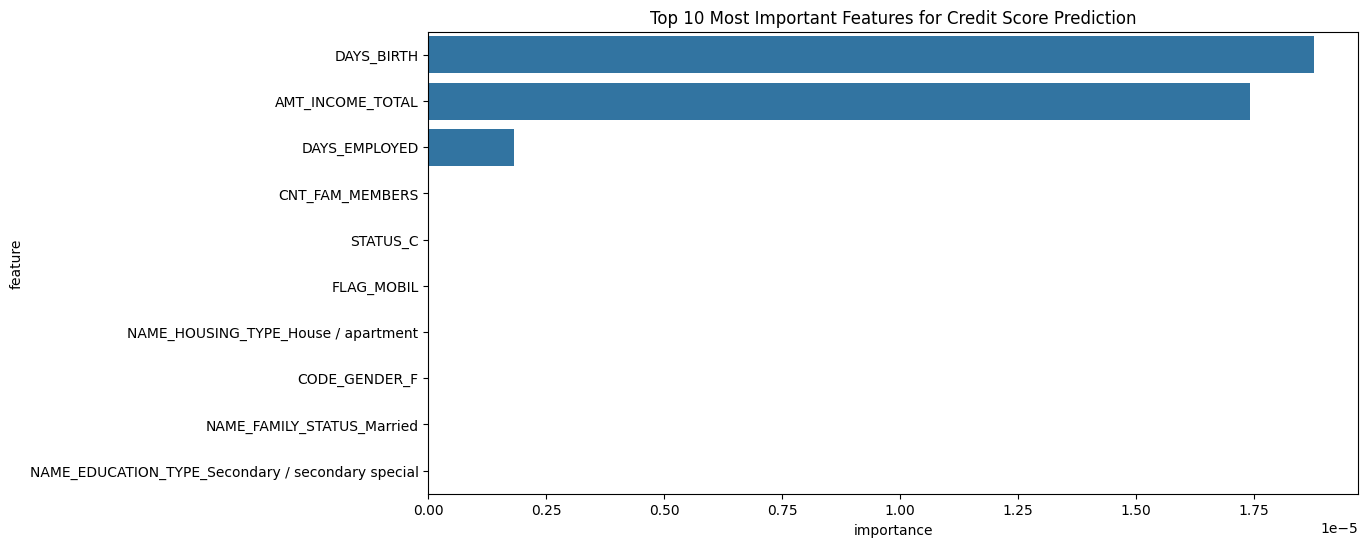

In [ ]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features for Credit Score Prediction')
plt.show()


In [ ]:
# Create a function to calculate credit score
def calculate_credit_score(features):
    # Scale the probability to a credit score (e.g., 300-850 range)
    probability = model.predict_proba(features)[:, 1]
    credit_score = 300 + (probability * 550)
    return credit_score


In [ ]:
# Example of calculating credit score for test data
test_scores = calculate_credit_score(X_test)


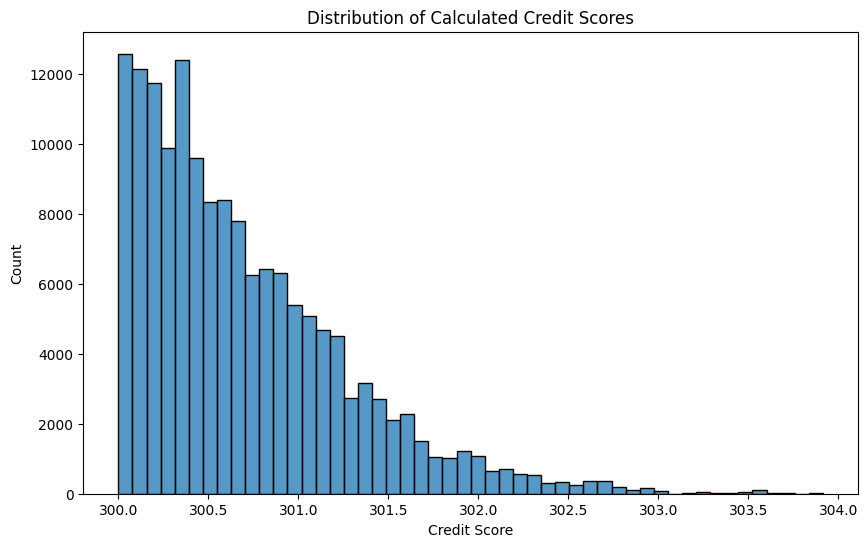

In [ ]:
# Visualize the distribution of credit scores
plt.figure(figsize=(10, 6))
sns.histplot(test_scores, bins=50)
plt.title('Distribution of Calculated Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()
